# Train-Test Split

In [1]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

# Set Default Fonts
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial", "Tahoma"]

# Set Default font sizes
small_size = 12
medium_size = 14
large_size = 16

# # Change the font size for individual elements
matplotlib.rc("font", size=small_size)  # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=medium_size)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)  # legend fontsize
matplotlib.rc("axes", titlesize=large_size)  # title fontsize

### For daily data

In [3]:
summed_data = pd.read_parquet("../data/02_intermediate/summed_data.parquet")

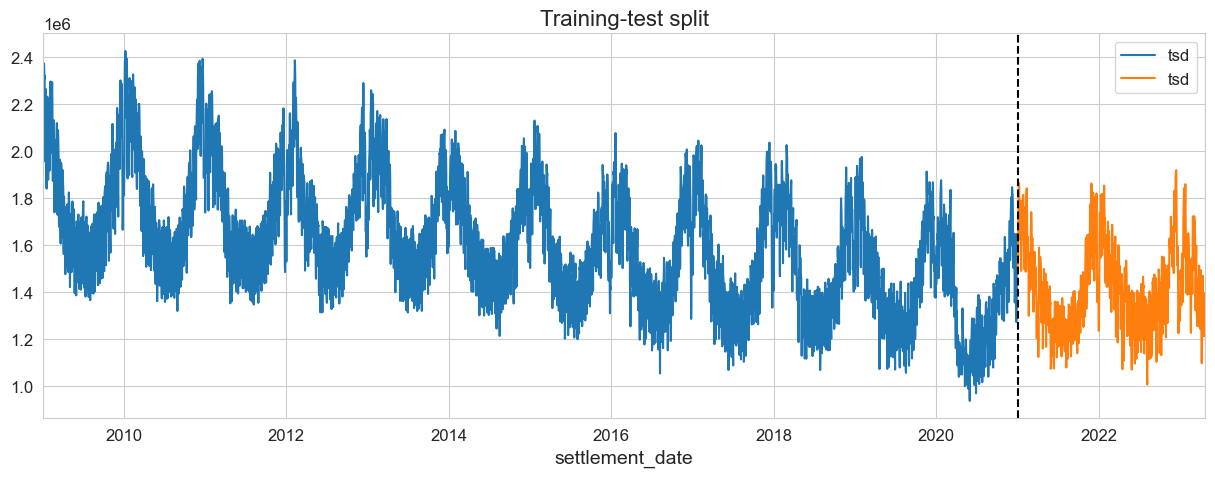

In [4]:
threshold_date = "01-01-2021"
train_data = summed_data.loc[summed_data.index < threshold_date, "tsd"].to_frame()
test_data = summed_data.loc[summed_data.index >= threshold_date, "tsd"].to_frame()

fig, ax = plt.subplots(figsize=(15, 5))
train_data.plot(ax=ax, label="Training set")
test_data.plot(ax=ax, label="Test set")
ax.axvline(threshold_date, color="k", ls="--")
ax.set_title("Training-test split")
plt.legend();

In [5]:
train_data.to_parquet('../data/03_train-test/summed_data_train.parquet')
test_data.to_parquet('../data/03_train-test/summed_data_test.parquet')

### For the complete dataset

In [10]:
df = pd.read_parquet('../data/02_intermediate/data.parquet')

In [11]:
threshold_date_1 = "01-01-2021"
train_data = df.loc[df.index < threshold_date_1]
test_data = df.loc[(df.index >= threshold_date_1)]

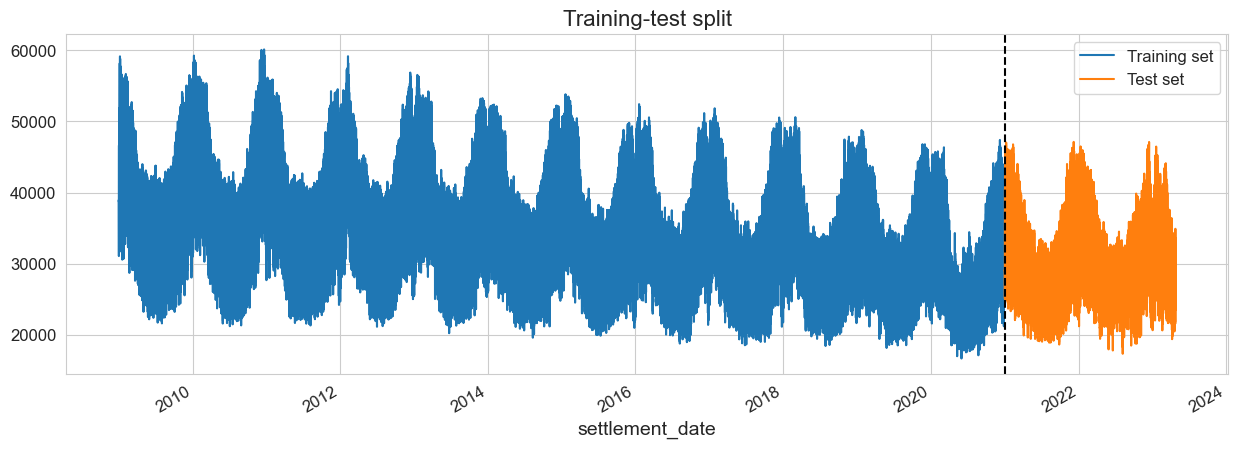

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
train_data["tsd"].plot(ax=ax, label="Training set")
test_data["tsd"].plot(ax=ax, label="Test set")
ax.axvline(threshold_date_1, color="k", ls="--")
ax.set_title("Training-test split")
plt.legend();

In [8]:
y_train = train_data['tsd']
y_test = test_data['tsd']
y_all = df['tsd']

In [9]:
y_test

settlement_date
2021-01-01 00:00:00    28969
2021-01-01 00:30:00    29114
2021-01-01 01:00:00    28376
2021-01-01 01:30:00    27749
2021-01-01 02:00:00    27178
                       ...  
2023-04-25 21:30:00    31142
2023-04-25 22:00:00    29292
2023-04-25 22:30:00    27807
2023-04-25 23:00:00    26244
2023-04-25 23:30:00    25407
Name: tsd, Length: 40554, dtype: int64

In [10]:
train_data = y_train.to_frame() \
                            .reset_index() \
                            .rename(columns={"settlement_date": "ds", "tsd": "y"})
test_data = y_test.to_frame() \
                            .reset_index() \
                            .rename(columns={"settlement_date": "ds", "tsd": "y"})
all_data = y_all.to_frame() \
                            .reset_index() \
                            .rename(columns={"settlement_date": "ds", "tsd": "y"})

In [12]:
train_data.to_parquet('../data/03_train-test/train_data.parquet')
test_data.to_parquet('../data/03_train-test/test_data.parquet')
all_data.to_parquet('../data/03_train-test/all_data.parquet')

In [6]:
summed_data = pd.read_parquet("../data/02_intermediate/summed_data.parquet")

threshold_date = "01-01-2021"
summed_train_data = summed_data.loc[summed_data.index < threshold_date, "tsd"].to_frame()
summed_test_data = summed_data.loc[summed_data.index >= threshold_date, "tsd"].to_frame()

In [18]:
import datetime

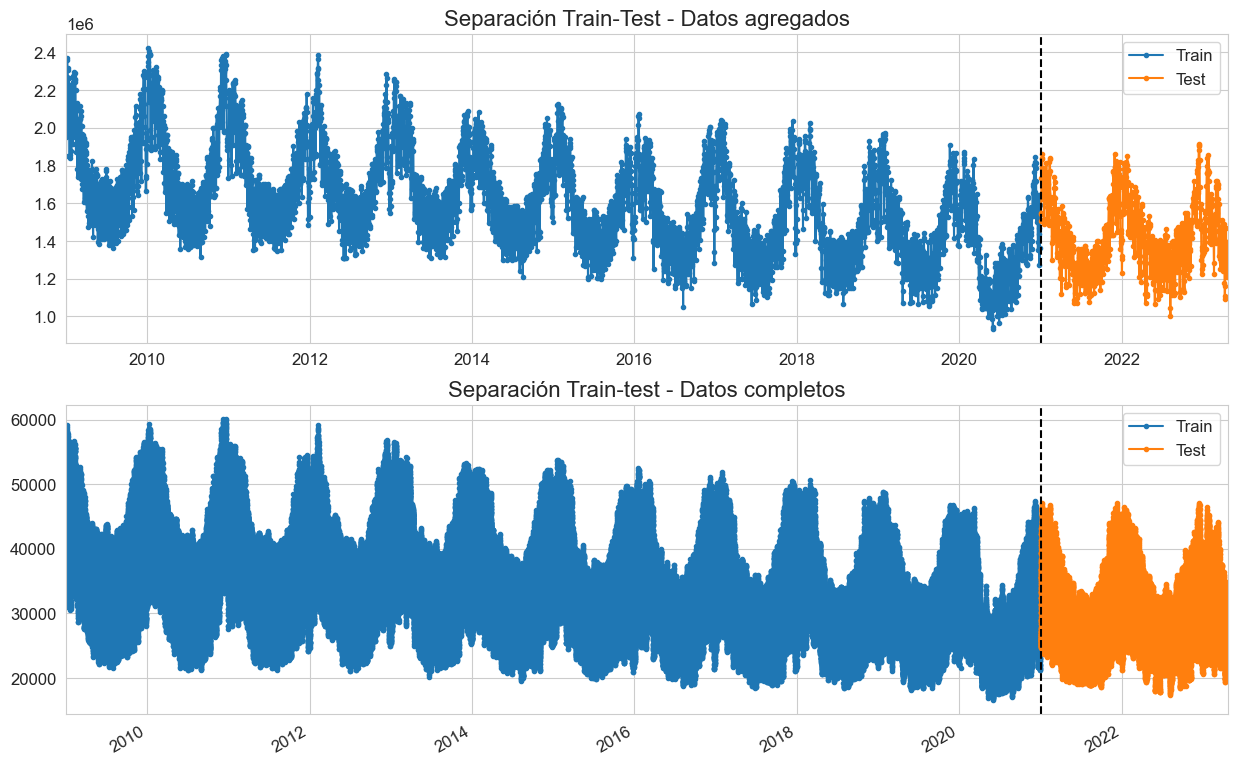

In [19]:
fig, (ax, bx) = plt.subplots(2,1,figsize=(15, 10))
summed_train_data.plot(ax=ax, label="Training set", marker='.')
summed_test_data.plot(ax=ax, label="Test set", marker='.')
ax.axvline(threshold_date, color="k", ls="--")
ax.set_title("Separación Train-Test - Datos agregados")
ax.legend(['Train', 'Test'])
ax.set_xlabel('')

train_data["tsd"].plot(ax=bx, label="Training set", marker='.')
test_data["tsd"].plot(ax=bx, label="Test set", marker='.')
bx.axvline(threshold_date_1, color="k", ls="--")
bx.set_title("Separación Train-test - Datos completos")
bx.set_xlim(left=datetime.date(2009,1,1), right=datetime.date(2023,4,25))
bx.legend(['Train', 'Test'])
bx.set_xlabel('')


plt.savefig("../graphs/train-test.png")